- **Multiclass Classification**: One sample, one label
    - Photo of pizza: It can only be pizza, it cannot be steak
- **Multilabel Classification**: One sample, multilabels
    - Article: Can have many tags

# Introduction to Neural Network Classification

## Creating Data to View and Fit

In [1]:
from sklearn.datasets import make_circles

In [2]:
# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## Visualizing the Data

In [5]:
import pandas as pd

In [6]:
# Getting all of the items in the zero axis and then, 
# all of the items in the 1 axis
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label': y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt

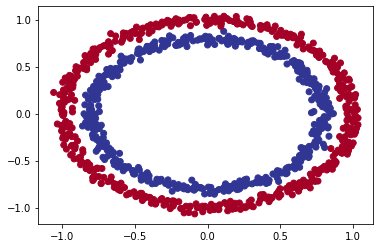

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output Shapes

In [9]:
# Check the shapes of the features and labels
X.shape, y.shape # y data is scalar

((1000, 2), (1000,))

In [10]:
# How many samples
len(X), len(y)

(1000, 1000)

In [11]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modelling

In [12]:
import tensorflow as tf

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 13ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 1s 18ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 8ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 10ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 13ms/step - loss: 0.6942 - accuracy: 0.4820


### Improving the Model

In [14]:
# Should be fitting with the train data and evaluate with the test data
# But it's a toy dataset
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3 Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [16]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [18]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

#### Creating a Plotting Function

In [19]:
import numpy as np

In [20]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [21]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
xx, yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [22]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    https://cs.stanford.edu/people/karpathy/cs231nfiles/minimal_net.html
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values (make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print('Doing Multiclass Classification')
        # Reshape the predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('Doing Binary Classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing Binary Classification


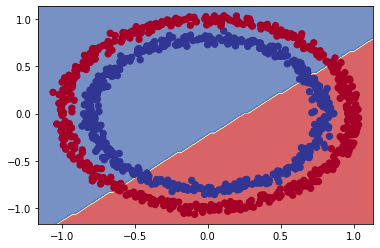

In [23]:
# Check the predictions the model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

#### Seeing if this Model can be Used for a Regression Problem

In [24]:
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100
X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [25]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3_reg.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae'])

In [26]:
# Split the regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# 3. Fit the model to the regression data
model_3_reg.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 6ms/step


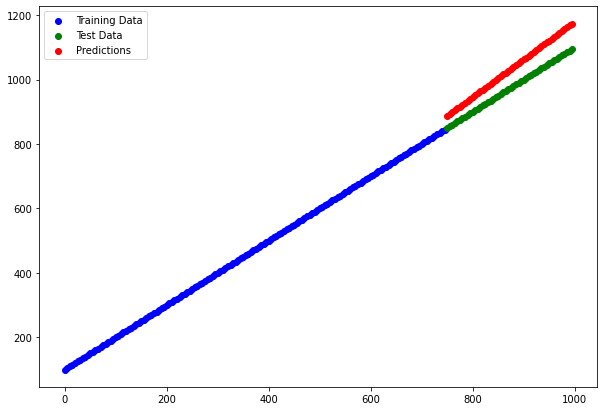

In [27]:
# Making predictions with the trained model
y_reg_preds = model_3_reg.predict(X_reg_test)

# Plot the model's predictions against the regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training Data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test Data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend()

## Non-linearity

In [28]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear')
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100, verbose=0)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
# 4. Evaluate the model
model_4.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 3.6831 - accuracy: 0.4210


[3.683102607727051, 0.42100000381469727]

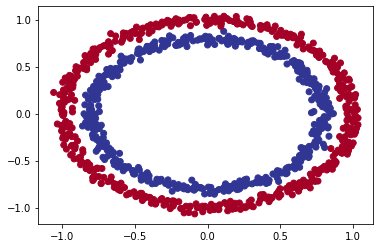

In [30]:
# Check the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
Doing Binary Classification


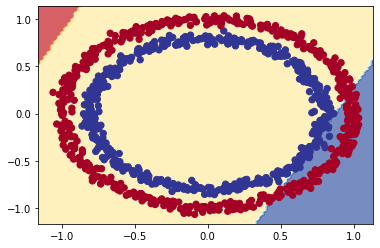

In [31]:
# Check the decision boundary
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

### Building a Model with a Non-linear Activation Function

In [32]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='ReLU')
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100, verbose=0)

In [33]:
# 4. Evaluate the model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 3.6831 - accuracy: 0.4210


[3.683102607727051, 0.42100000381469727]

### Improving the Model

In [34]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100, verbose=0)

In [35]:
# 4. Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
Doing Binary Classification


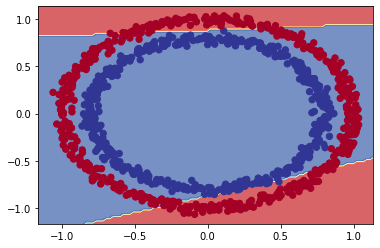

In [36]:
plot_decision_boundary(model_6, X, y)

In [37]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs=200, verbose=0)

In [38]:
# 4. Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9930


[0.06901049613952637, 0.9929999709129333]

313/313 [==============================] - 1s 1ms/step
Doing Binary Classification


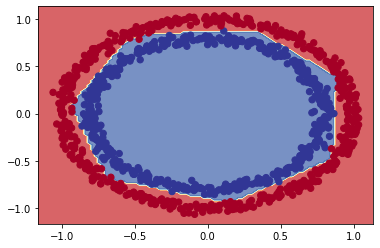

In [39]:
plot_decision_boundary(model_7, X, y)

## Replicating Non-linear Activation Functions

In [40]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

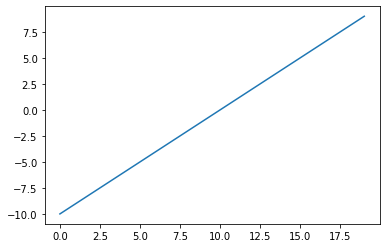

In [41]:
# Visualize the toy tensor
plt.plot(A)

### Sigmoid

In [42]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [43]:
# Using the sigmoid function on the toy data
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

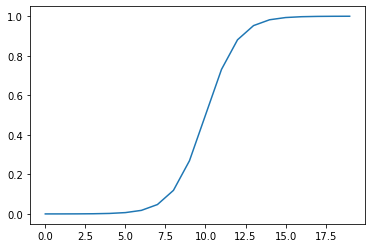

In [44]:
# Plotting the tensor transformed by sigmoid
plt.plot(sigmoid(A))

### ReLU

In [45]:
def relu(x):
    return tf.maximum(0, x)

In [46]:
# Pass the toy tensor to the ReLU function
A, relu(A)

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>, <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
        7., 8., 9.], dtype=float32)>)

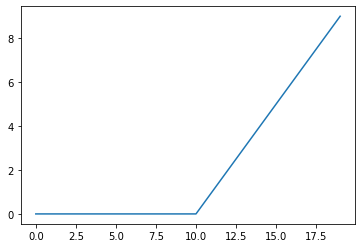

In [47]:
# Plotting the tensor transformed by ReLU
plt.plot(relu(A))

## Evaluating and Improving the Classification

In [48]:
# Check how many examples there are
len(X)

1000

In [49]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [50]:
# Set random seed
tf.random.set_seed(42)

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X_train, y_train, epochs=40, verbose=1)

Epoch 1/40
25/25 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9862
Epoch 2/40
25/25 [==============================] - 0s 2ms/step - loss: 0.0708 - accuracy: 0.9887
Epoch 3/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0704 - accuracy: 0.9825
Epoch 4/40
25/25 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9850
Epoch 5/40
25/25 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9912
Epoch 6/40
25/25 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9937
Epoch 7/40
25/25 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9937
Epoch 8/40
25/25 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9875
Epoch 9/40
25/25 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9900
Epoch 10/40
25/25 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9900
Epoch 11/40
25/25 [

In [51]:
# 4. Evaluate the model
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9850


[0.0496118925511837, 0.9850000143051147]

313/313 [==============================] - 1s 1ms/step
Doing Binary Classification
313/313 [==============================] - 1s 2ms/step
Doing Binary Classification


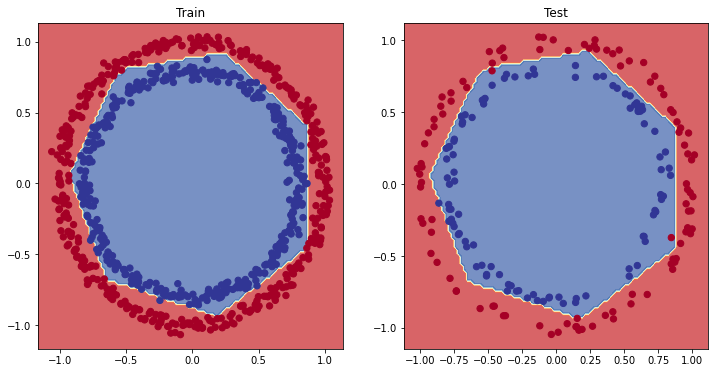

In [52]:
# Plotting the decision boundaries for the training and testing set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_7, X=X_test, y=y_test)
plt.show()

## Plotting the Loss (or Training) Curves

In [53]:
history.history.items()

dict_items([('loss', [0.07810971885919571, 0.0707927793264389, 0.07036375254392624, 0.06963460892438889, 0.056656502187252045, 0.052156563848257065, 0.05205008015036583, 0.052924927324056625, 0.04881452023983002, 0.047006044536828995, 0.04257572069764137, 0.041794247925281525, 0.042030978947877884, 0.04009956866502762, 0.0390997976064682, 0.038014933466911316, 0.03797958046197891, 0.036130644381046295, 0.038605909794569016, 0.036497119814157486, 0.03381028026342392, 0.03449872136116028, 0.02959960699081421, 0.03373606503009796, 0.0324680358171463, 0.029750237241387367, 0.029527271166443825, 0.03110070526599884, 0.030231449753046036, 0.031877301633358, 0.030241429805755615, 0.025236034765839577, 0.026942528784275055, 0.026829635724425316, 0.02583486959338188, 0.028386855497956276, 0.028852615505456924, 0.0343778021633625, 0.026447854936122894, 0.02474040351808071]), ('accuracy', [0.9862499833106995, 0.9887499809265137, 0.9825000166893005, 0.9850000143051147, 0.9912499785423279, 0.993749

In [54]:
# Converting the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.078110,0.98625
1,0.070793,0.98875
2,0.070364,0.98250
3,0.069635,0.98500
4,0.056657,0.99125
5,0.052157,0.99375
6,0.052050,0.99375
7,0.052925,0.98750
8,0.048815,0.99000
9,0.047006,0.99000


Text(0.5, 1.0, "Model's Loss Curves")

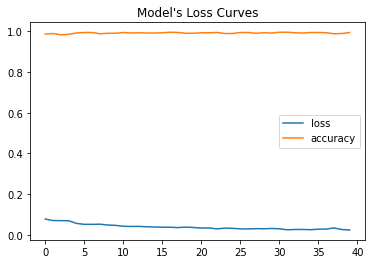

In [55]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model's Loss Curves")

## Finding the Best Learning Rate

In [56]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10 ** (epoch / 20))

# 3. Fit the model
history = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

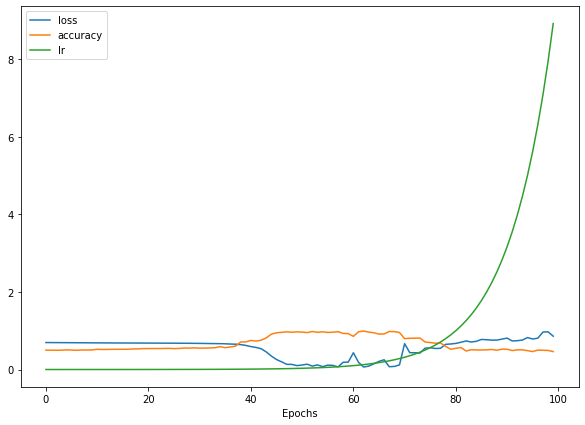

In [57]:
# Check history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel='Epochs')

In [58]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100) / 20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning Rate vs Loss')

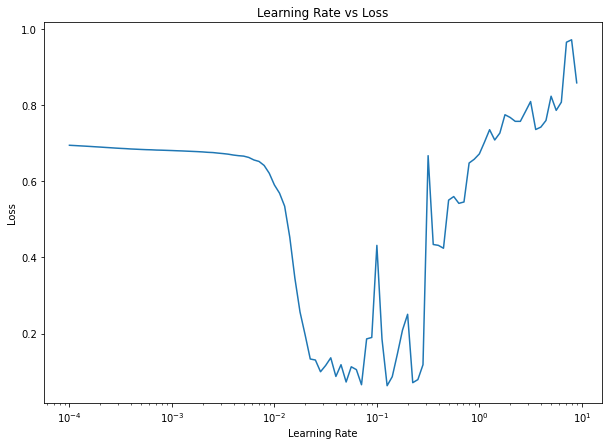

In [59]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')

- According to the graph above, the ideal learning rate is about 0.02

In [60]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

# 3. Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [61]:
# 4. Evaluate the model
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900


[0.0574018768966198, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
Doing Binary Classification
313/313 [==============================] - 1s 2ms/step
Doing Binary Classification


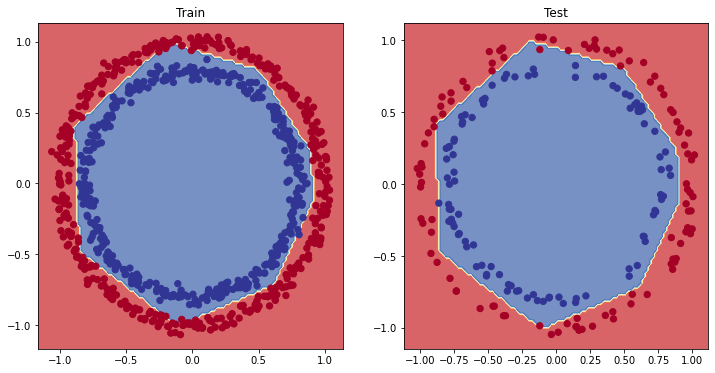

In [62]:
# Plot the decision boundaries for the training and testing sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More Classification Evaluation Metrics

In [63]:
# Check the accuracy of the model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.0574018768966198
Model accuracy on the test set: 99.00%


In [64]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

In [65]:
y_preds = model_10.predict(X_test)
print(y_test[:10])
print(y_preds[:10])

7/7 [==============================] - 0s 2ms/step
[1 1 1 1 0 0 1 0 1 0]
[[9.8526549e-01]
 [9.9923790e-01]
 [9.9032348e-01]
 [9.9706942e-01]
 [3.9622915e-01]
 [1.8126918e-02]
 [9.6829075e-01]
 [1.9746752e-02]
 [9.9967164e-01]
 [5.6459103e-04]]


- ValueError: Classification metrics can't handle a mix of binary and continuous targets
- Got to transform y_preds into binary form

In [66]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [67]:
# Create the confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

In [68]:
# Prettify confusion matrix
import itertools

In [120]:
def plot_confusion_matrix(y_true, y_preds, classes=None, figsize = (10, 10), text_size=15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_preds) # tf.round(y_preds)
    # Normalize the consfusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axis
    ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size);

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)',
                horizontalalignment='center',
                color='white' if cm[i, j] > threshold else 'black',
                size=text_size)

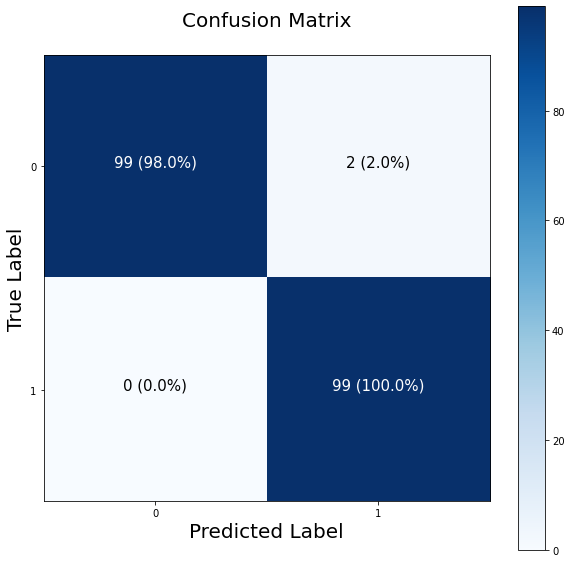

In [70]:
plot_confusion_matrix(y_test, y_preds)

# Larger Example (Multiclass Classification)



In [71]:
from tensorflow.keras.datasets import fashion_mnist

In [72]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [73]:
# Show first training example
print(f'Training Sample: \n{train_data[0]}\n')
print(f'Training Label: \n{train_labels[0]}')

Training Sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [74]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

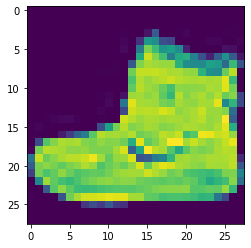

In [75]:
# Plot a single sample
plt.imshow(train_data[0])

In [76]:
# Create a small list so the training labels can be indexed
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

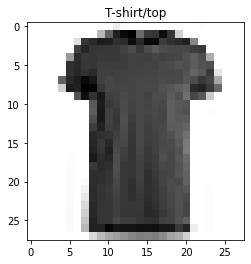

In [77]:
# Plot an example image and it's label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

In [78]:
# Plot multiple random images
import random

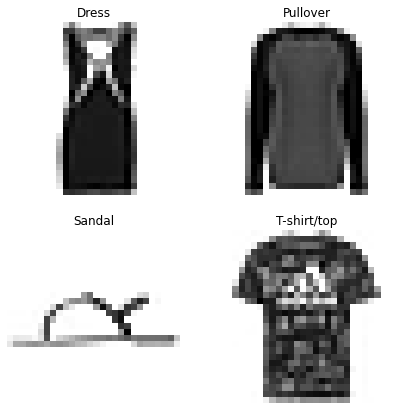

In [79]:
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a Multiclass Classification Model

In [80]:
# Shape of one image
train_data[0].shape

(28, 28)

In [81]:
# Output shape
len(class_names)

10

In [88]:
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28))
])
flatten_model.output_shape

(None, 784)

In [92]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
# CategoricalCrossentropy expects an one_hot representation of labels
# For integer labels: SparseCategoricalCrossentropy
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# 3. Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs=10, 
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy:

In [93]:
# Check the model summary
model_11.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 4)                 3140      
                                                                 
 dense_40 (Dense)            (None, 4)                 20        
                                                                 
 dense_41 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [95]:
# Get the training and testing data between 0's and 1's by dividing by the max
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the normalized data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [107]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fitting the model on the normalized data
norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, 
             validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [102]:
import pandas as pd

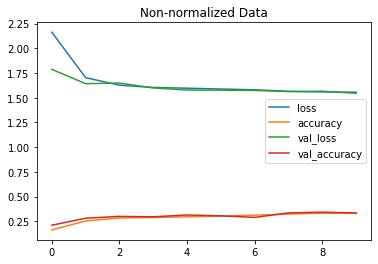

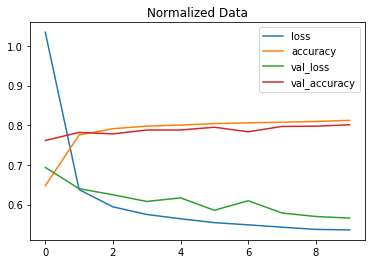

In [108]:
# Plot the non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized Data')
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized Data')

## Finding the Ideal Learning Rate

In [112]:
from sklearn.utils import validation
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10 ** (epoch / 20)
)

# 3. Fit the model
find_lr_history = model_13.fit(train_data_norm, train_labels, epochs=40,
             validation_data=(test_data_norm, test_labels),
             callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

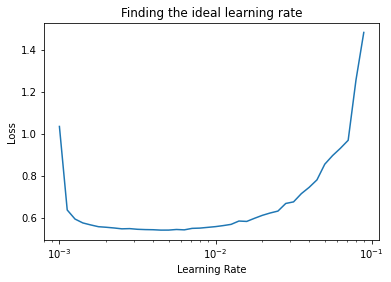

In [113]:
# Plotting the learning rate decay curve
lrs = 1e-3 * (10 ** (tf.range(40) / 20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

- Ideal learning rate is about 1e-3, the default lr for Adam

## Evaluating the Multiclass Classification Model

In [129]:
# Creating a confusion matrix
# Making some predictions
# probs is short for "prediction probabilities"
y_probs = model_12.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.67574907e-10, 8.36209730e-15, 4.81270581e-05, 3.40115704e-08,
        1.23736900e-04, 2.73352742e-01, 3.39614473e-07, 8.82700235e-02,
        6.16735499e-03, 6.32037580e-01],
       [8.12879225e-05, 5.76159180e-15, 9.49077845e-01, 7.81007202e-07,
        8.87471065e-03, 8.59927472e-13, 4.17942740e-02, 5.20491658e-26,
        1.70956730e-04, 7.83170577e-08],
       [1.09286964e-04, 9.96481359e-01, 9.71142633e-09, 3.40284896e-03,
        2.56673161e-06, 1.08079314e-20, 3.80362485e-06, 1.49555103e-18,
        3.59249341e-08, 2.74248347e-14],
       [1.03193037e-04, 9.93369341e-01, 5.70141729e-08, 6.49506878e-03,
        2.15691525e-05, 1.15561135e-17, 1.01945043e-05, 3.01003661e-14,
        5.62862169e-07, 8.60025766e-12],
       [1.39543757e-01, 3.78134609e-06, 3.45286369e-01, 1.36686359e-02,
        3.66058536e-02, 5.40100846e-11, 4.62722063e-01, 3.91254594e-19,
        2.16952362e-03, 8.28047391e-08]], dtype=float32)

In [130]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.6757491e-10, 8.3620973e-15, 4.8127058e-05, 3.4011570e-08,
        1.2373690e-04, 2.7335274e-01, 3.3961447e-07, 8.8270023e-02,
        6.1673550e-03, 6.3203758e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [131]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

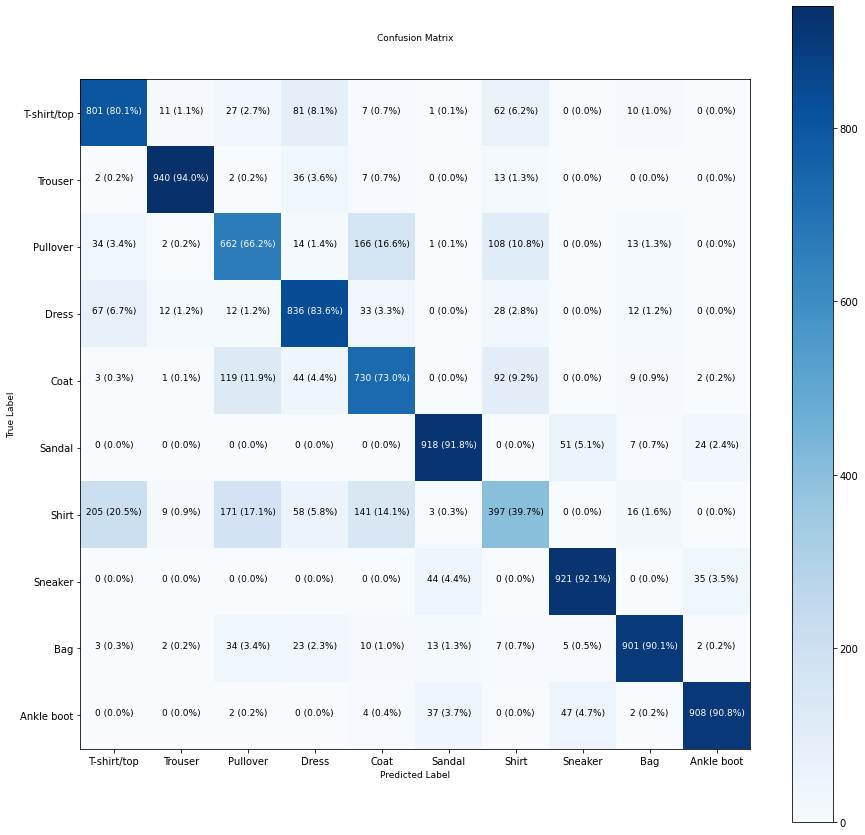

In [132]:
plot_confusion_matrix(test_labels, y_preds, class_names, figsize=(15, 15), 
                      text_size=9)

## Visualizing Random Model's Predictions

In [133]:
# Creating a function to plot a random image
def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction
    and truth label.
    """
    # Set a random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is 
    # right or wrong
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'

    # Add xlabel information (prediction / true label)
    plt.xlabel(f'Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% \
    (True: {true_label})', color=color)

1/1 [==============================] - 0s 21ms/step


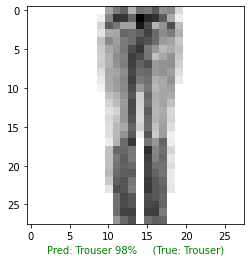

In [136]:
# Check a random image as well as it's prediction
plot_random_image(model=model_12,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

# What Patterns is the Model Learning?

In [137]:
# Find the layers
model_12.layers

In [138]:
# Getting the patterns of the first hidden layer
weights, biases = model_12.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.38585958, -0.01683232, -0.48614585, -0.53817415],
        [ 0.09176347, -0.07343117, -0.27991334,  0.04825679],
        [ 0.43908086,  0.46483982, -0.6423494 , -0.4443902 ],
        ...,
        [-0.2540554 ,  0.5379419 , -0.15410887,  0.15027744],
        [-0.23082425,  0.45492074,  0.08331519, -0.37904847],
        [ 0.15038307,  0.13788234, -0.14806944, -0.01065999]],
       dtype=float32), (784, 4))

In [139]:
# Bias and biases shape
biases, biases.shape

(array([-0.07772568,  0.08738951, -0.3689589 ,  0.7236027 ], dtype=float32),
 (4,))

- The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

In [140]:
# Checking the model
from tensorflow.keras.utils import plot_model

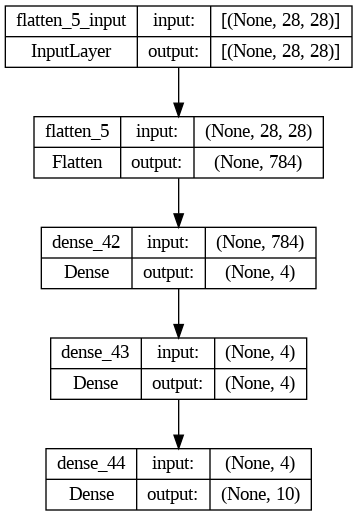

In [141]:
# See the inputs and outputs of each layer
plot_model(model_12, show_shapes=True)